# Homework 2 - Machine Learning Pipeline EDA
#### Author: Kunyu He, CAPP'20

In [1]:
import sys
sys.path.append('../')

In [2]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import viz
import seaborn as sns

In [3]:
INPUT_DIR = "../clean_data/"
OUTPUT_DIR = "./images/"
NON_NUMERIC = ["PersonID", "zipcode", "SeriousDlqin2yrs"]

In [4]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['savefig.dpi'] = 400
plt.rcParams['figure.dpi'] = 400

sns.set(style="white")

## 1. Load Data

Load data into our working environment.

In [5]:
data = viz.read_clean_data("data_types.json", "credit-clean.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41016 entries, 0 to 41015
Data columns (total 13 columns):
PersonID                                41016 non-null int64
SeriousDlqin2yrs                        41016 non-null int32
RevolvingUtilizationOfUnsecuredLines    41016 non-null float64
age                                     41016 non-null int32
zipcode                                 41016 non-null object
NumberOfTime30-59DaysPastDueNotWorse    41016 non-null int32
DebtRatio                               41016 non-null float64
MonthlyIncome                           41016 non-null float64
NumberOfOpenCreditLinesAndLoans         41016 non-null int32
NumberOfTimes90DaysLate                 41016 non-null int32
NumberRealEstateLoansOrLines            41016 non-null int32
NumberOfTime60-89DaysPastDueNotWorse    41016 non-null int32
NumberOfDependents                      41016 non-null int32
dtypes: float64(3), int32(8), int64(1), object(1)
memory usage: 2.8+ MB


Extract numeric columns from the data set.

In [6]:
numerics = data[[col for col in data.columns if col not in NON_NUMERIC]]
nvt = pd.concat([numerics, data.SeriousDlqin2yrs], axis=1)

## 2. EDA

### 2.1 Categorical Variables - Bar Charts

First check the frequencies of two discrete variables `SeriousDlqin2yrs` and `zipcode`.

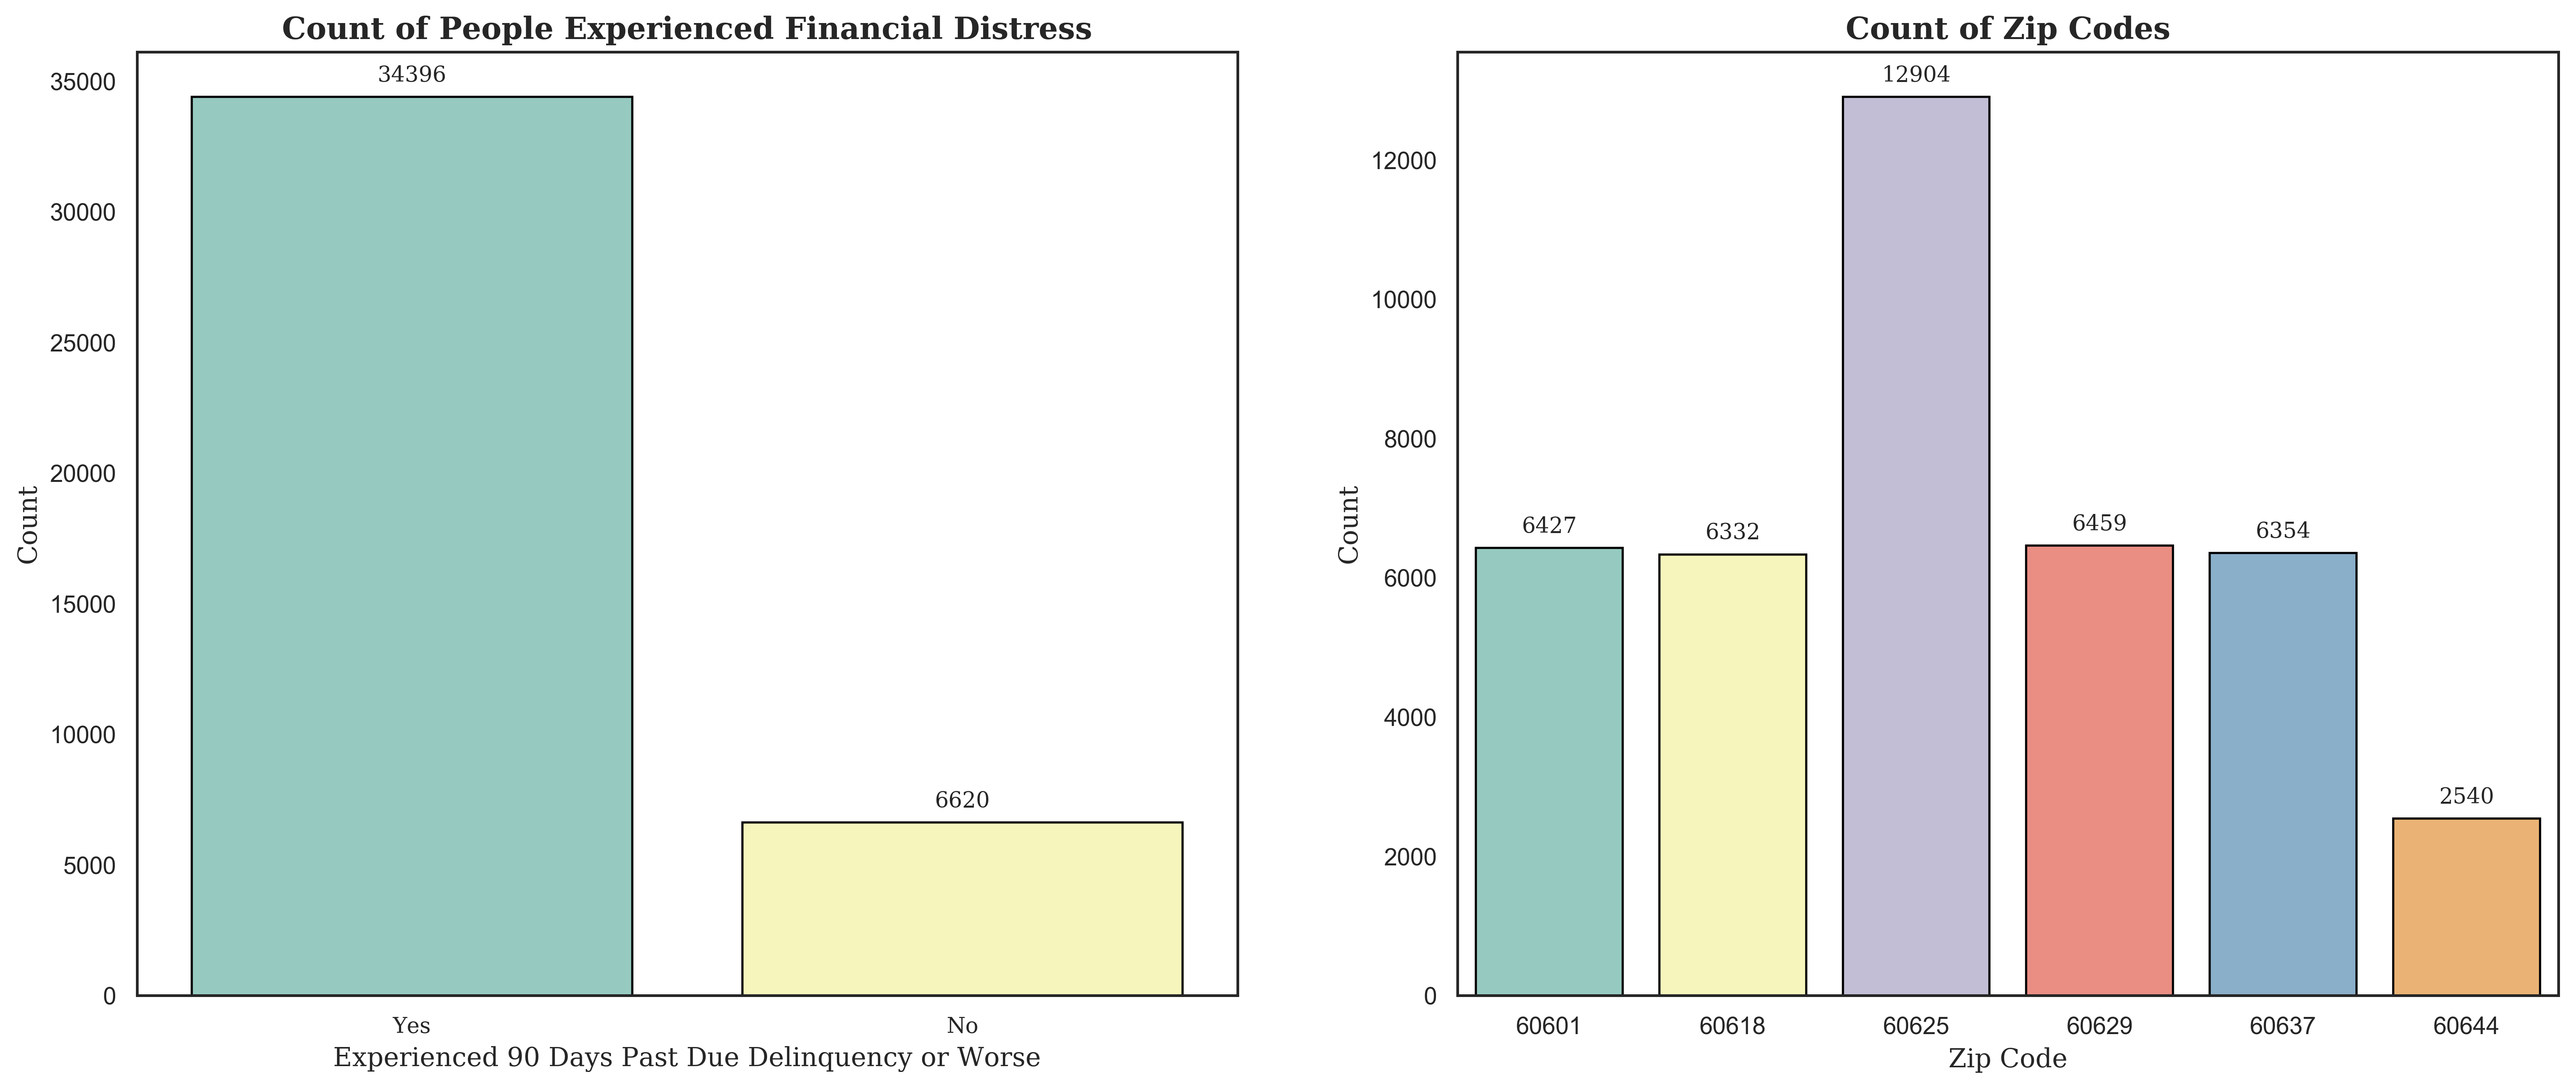

In [212]:
fig = plt.figure(figsize=[20, 8])
ax0 = fig.add_subplot(1, 2, 1)
ax1 = fig.add_subplot(1, 2, 2)

viz.bar_plot(ax0, data, "SeriousDlqin2yrs", sub=False,
             labels=["Count of People Experienced Financial Distress",
                     "Experienced 90 Days Past Due Delinquency or Worse",
                     "Count"], x_tick=[["Yes", "No"], None])

viz.bar_plot(ax1, data, "zipcode", sub=False,
             labels=["Count of Zip Codes", "Zip Code", "Count"])

plt.savefig(OUTPUT_DIR + 'figure-1.png')

We can see that in our sample, over 80% of observations have experienced 90 days past due delinquency or worse. And number of observations from zip code 60625 is much higher than the average, while that of observations from zip code 60644 is much lower than the average.

### 2.2 Numeric Variables

### 2.2.1 Correlation Matrix

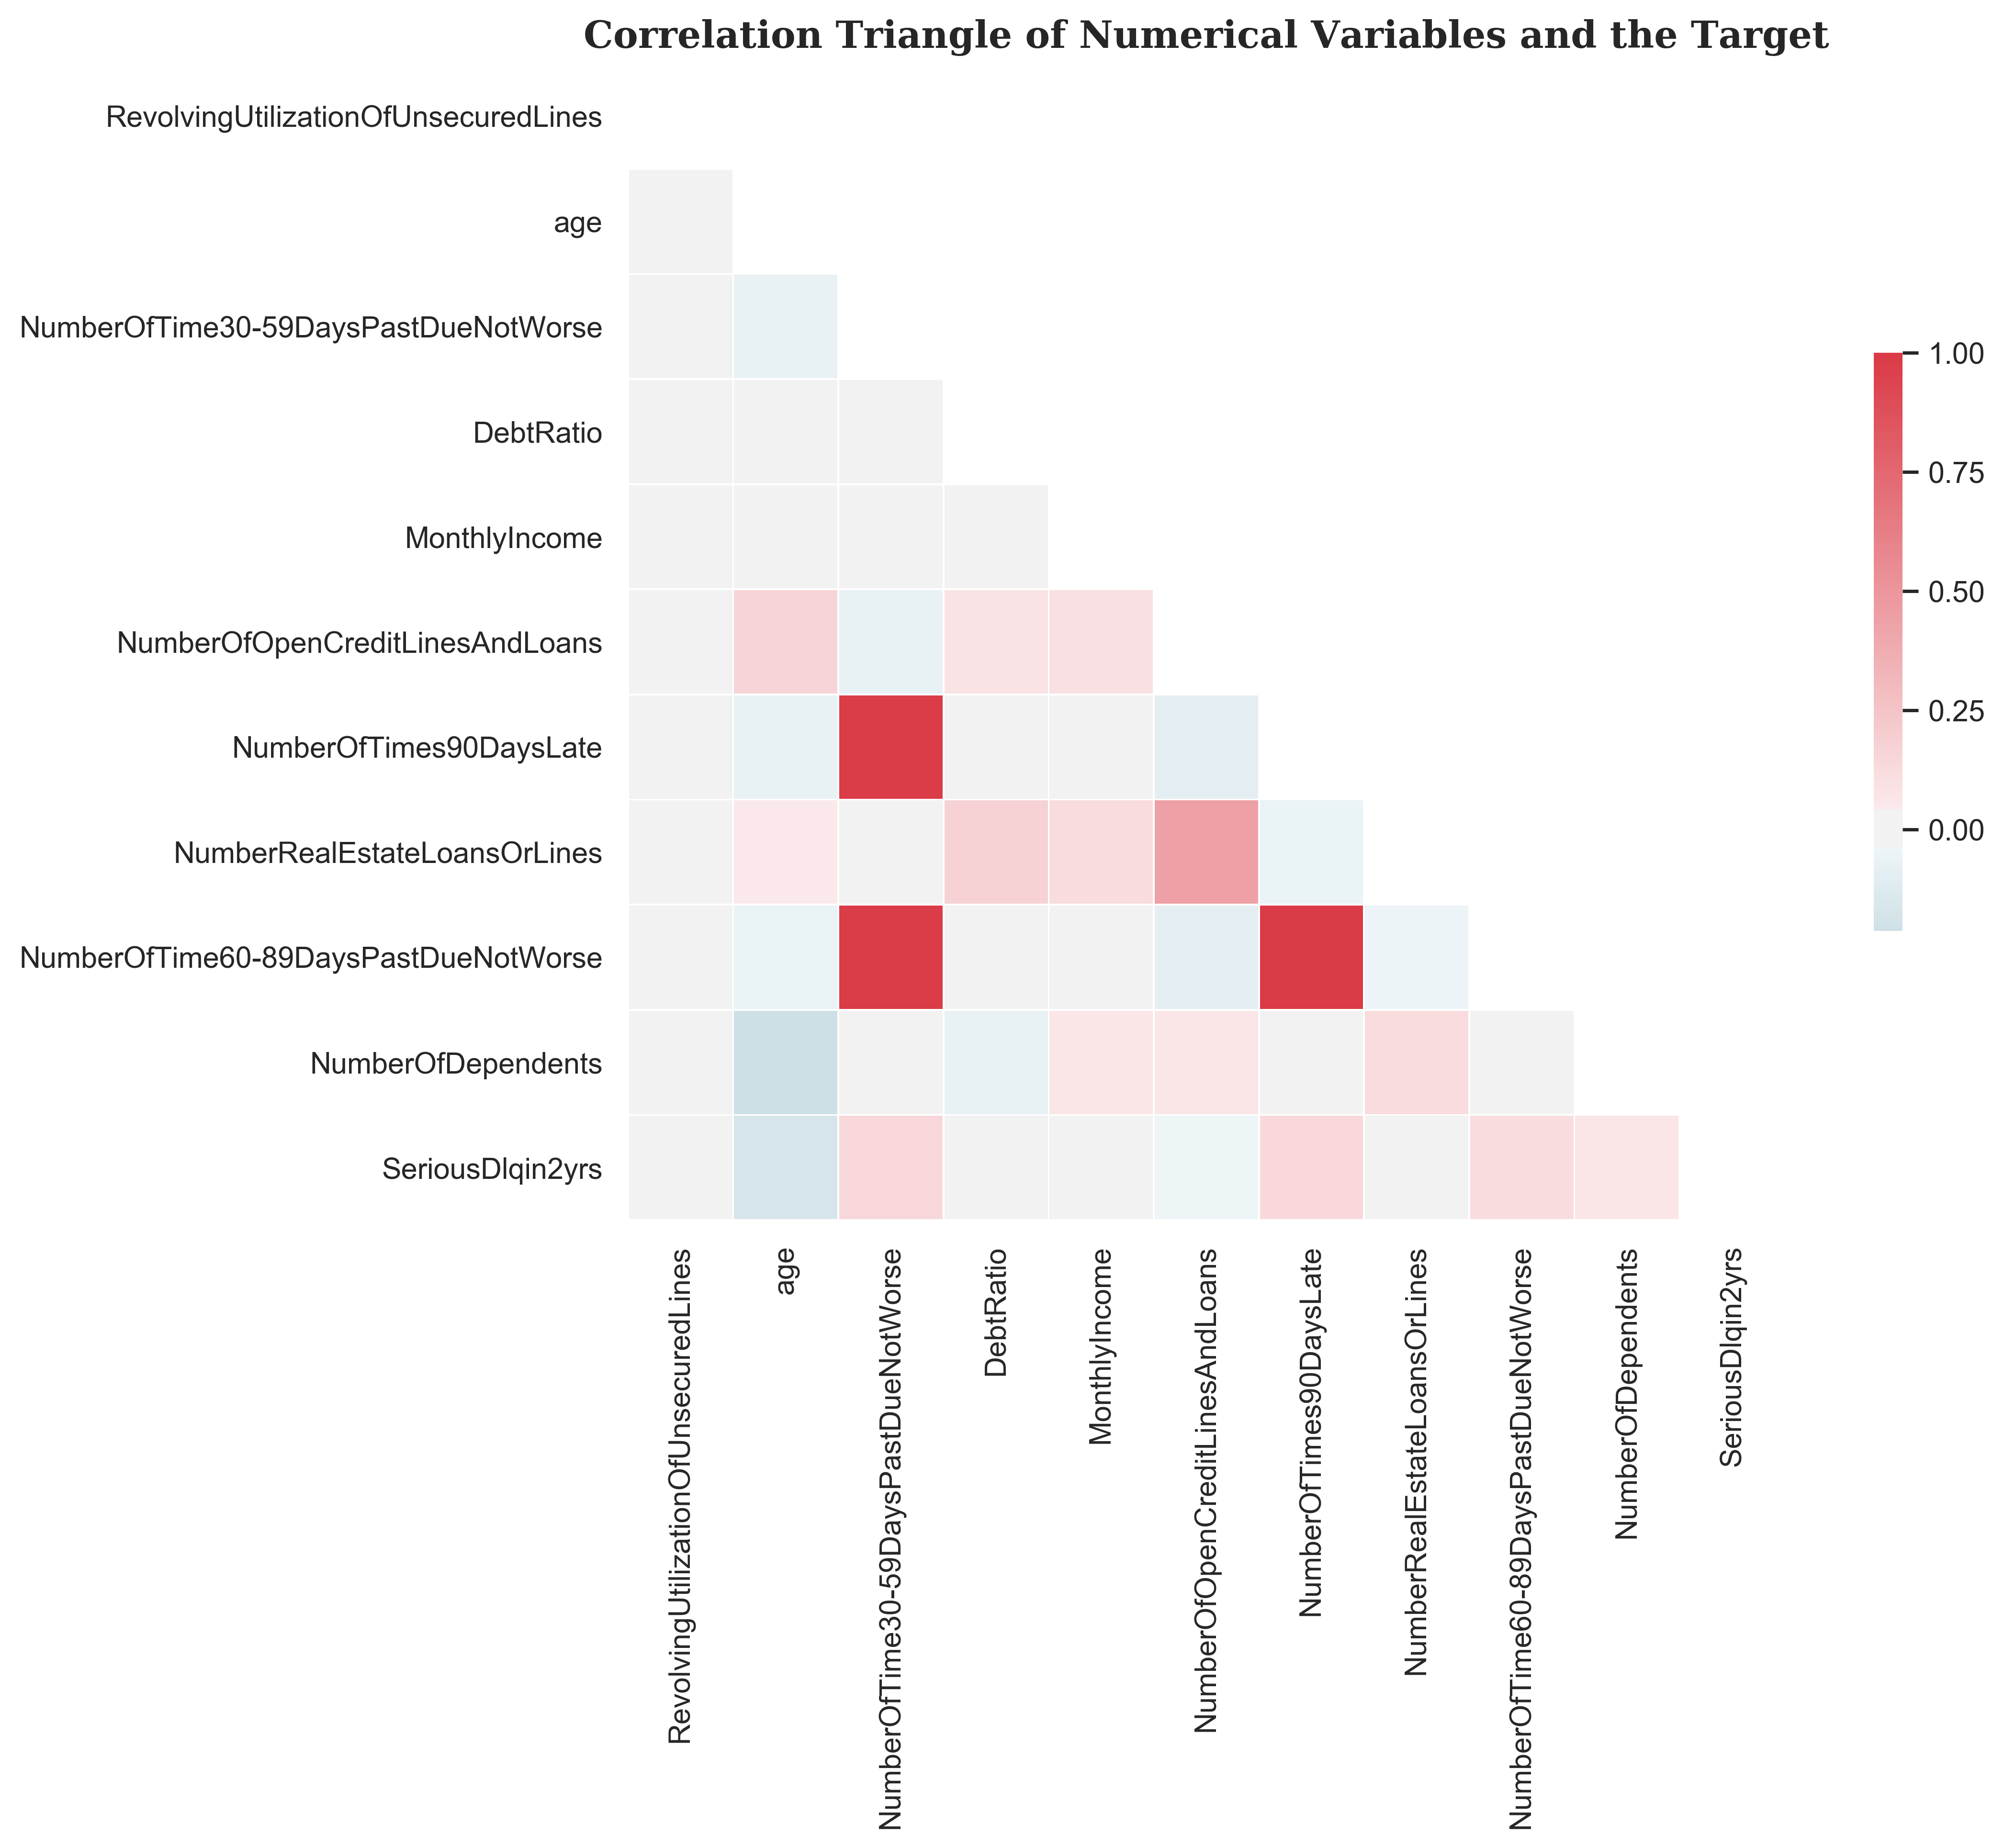

In [213]:
fig, ax = plt.subplots()
viz.corr_triangle(ax, nvt,
                  plot_title="Correlation Triangle of Numerical Variables and the Target")

plt.savefig(OUTPUT_DIR + 'figure-2.png')

We can see here our target, `SeriousDlqin2yrs`, is relatively positively correlated with **number of times borrower has been 30-59, 60-89, and 90+ days past due in the last 2 years** and **number of dependents in family excluding themselves**, and it's negatively correlated with **age**.

As expected, **number of times borrower go past due in the last 2 years are strongly correlated**. Consider combine those three variables in the feature engineering part.

### 2.2.2 Box Plots

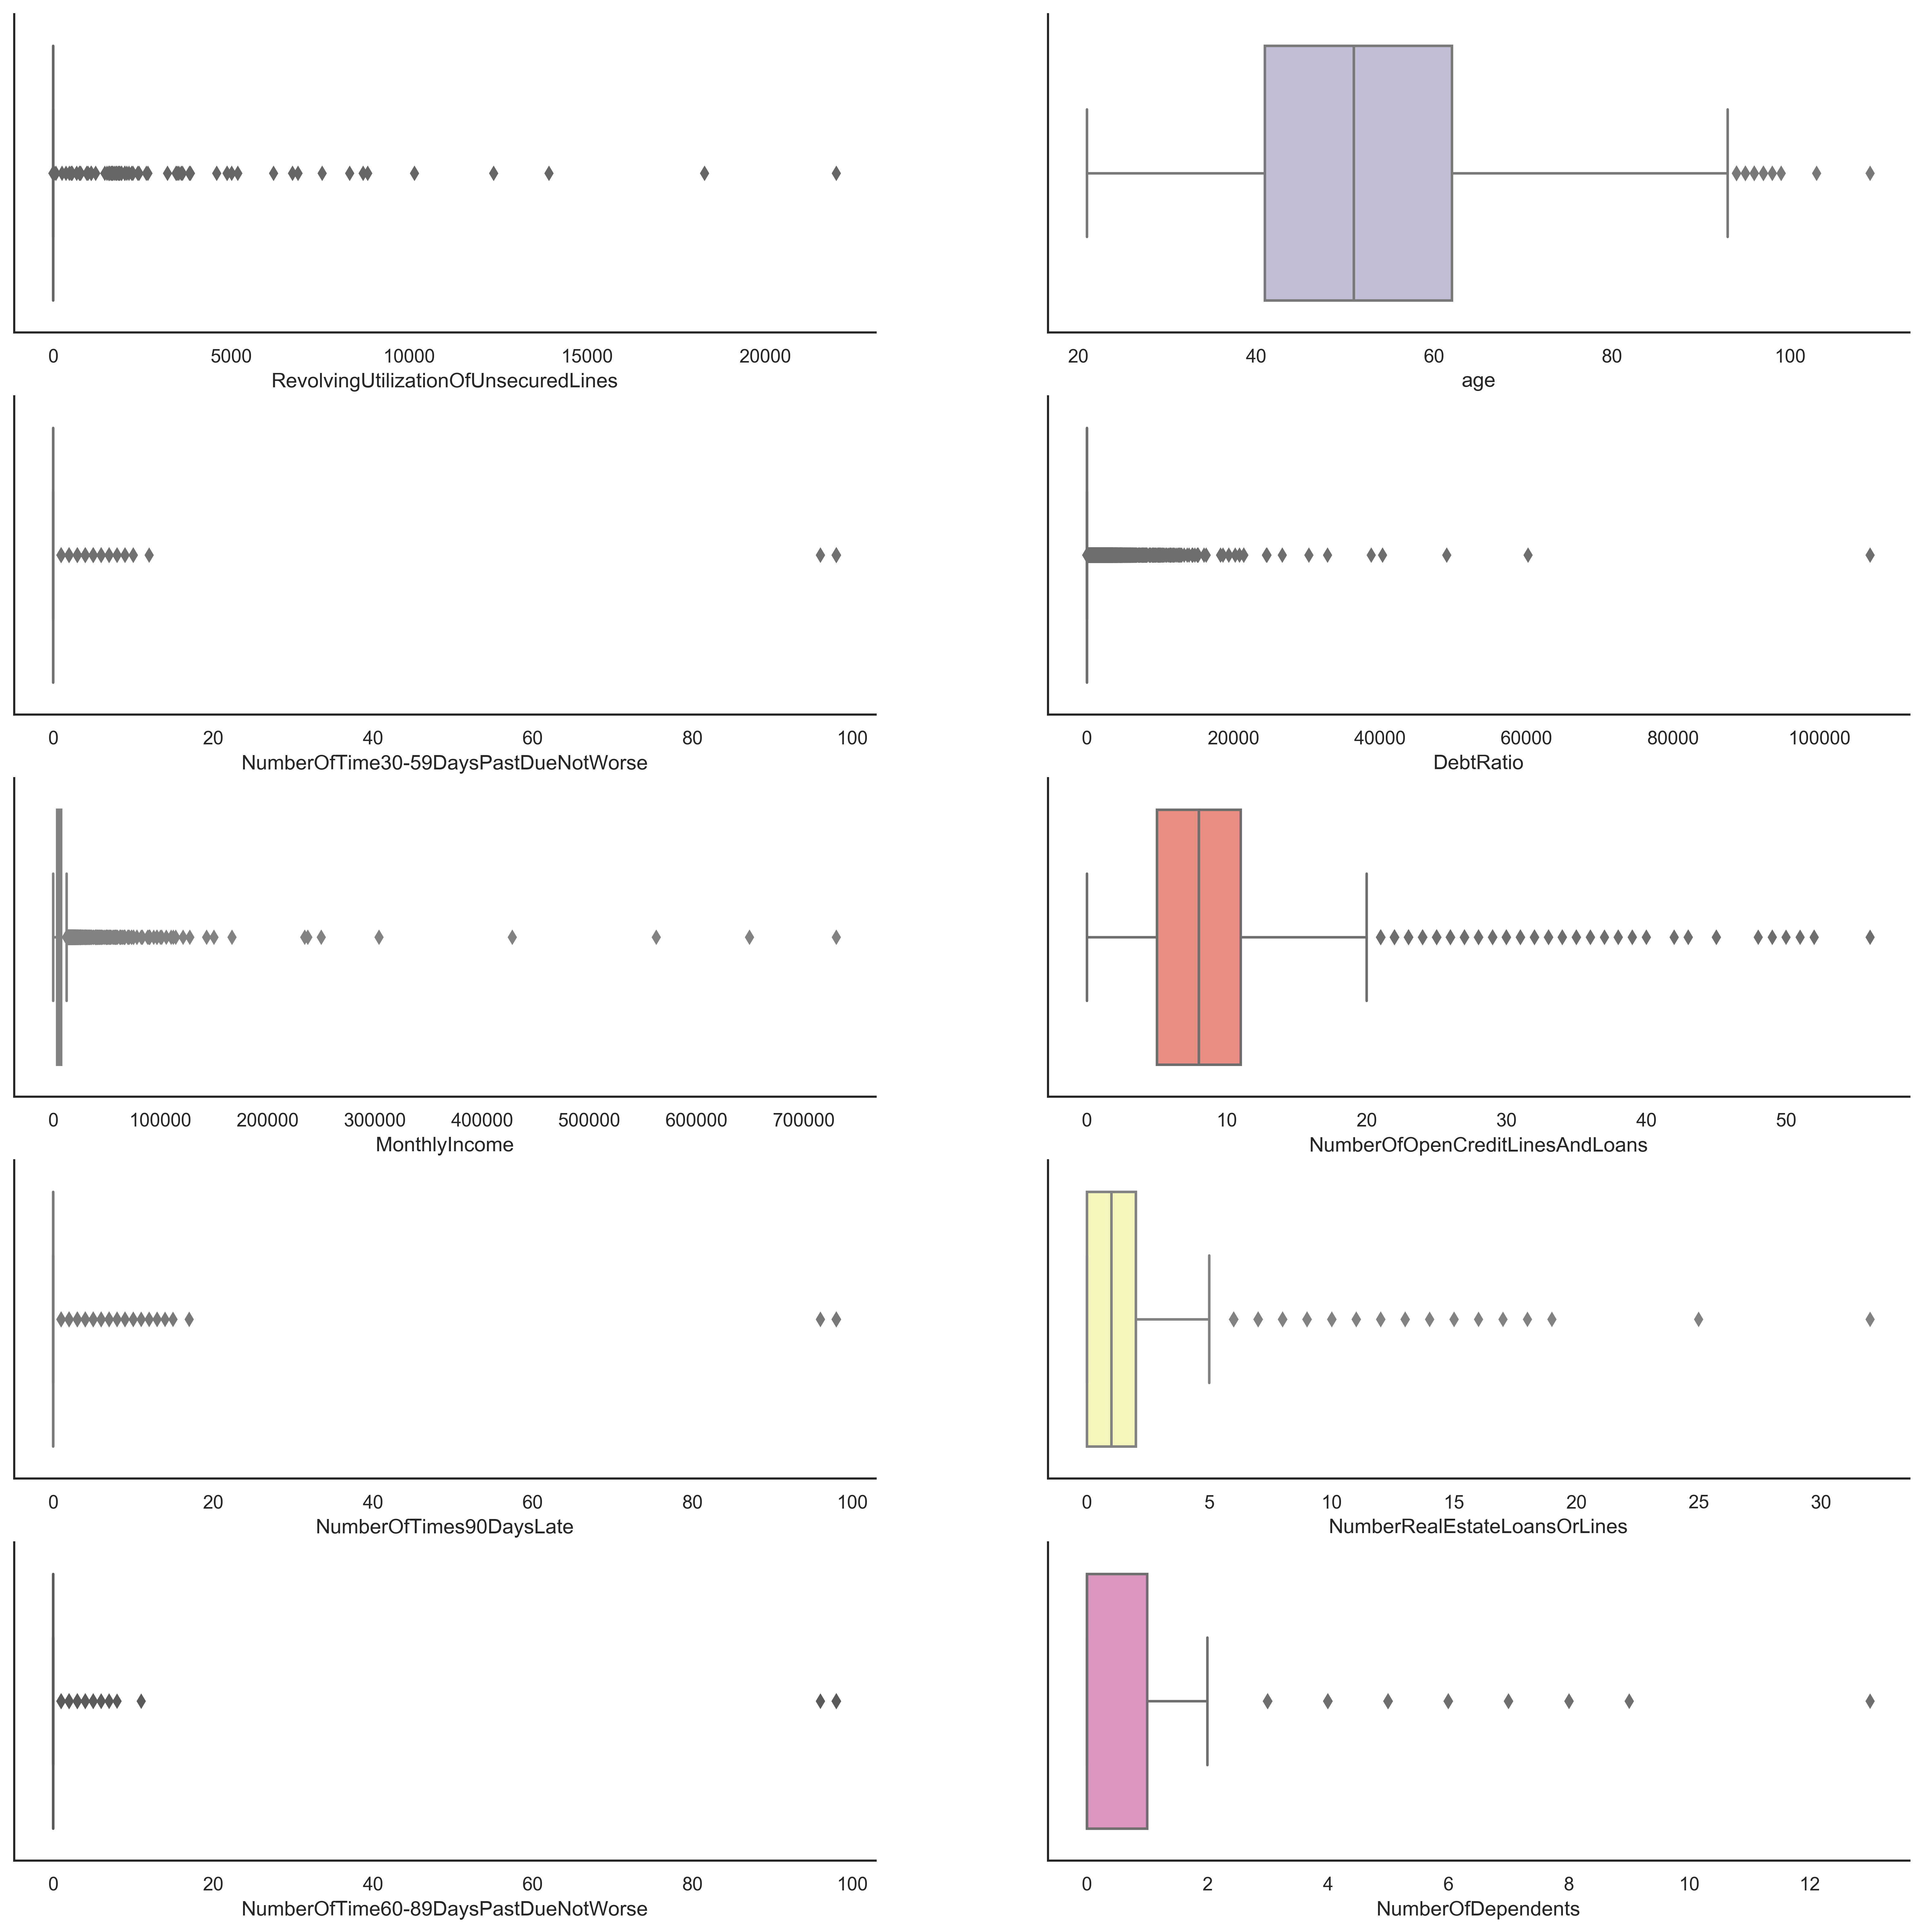

In [217]:
viz.box_plot(numerics)

plt.savefig(OUTPUT_DIR + 'figure-3.png')

There are a lot of outliers in our numerical data. As we would combine the number of times borrower go past due in the last 2 years, that wouldn't be a problem. But we should take care of the most extreme outliers in `DebtRatio` and `MonthlyIncome`.

### 2.2.3 Histograms

With so many outliers in our numerical data matrix, it's hard to describe their distribution in detail. So we limit the x-axis in the range of minimum to 95% quantile for better visualization below.

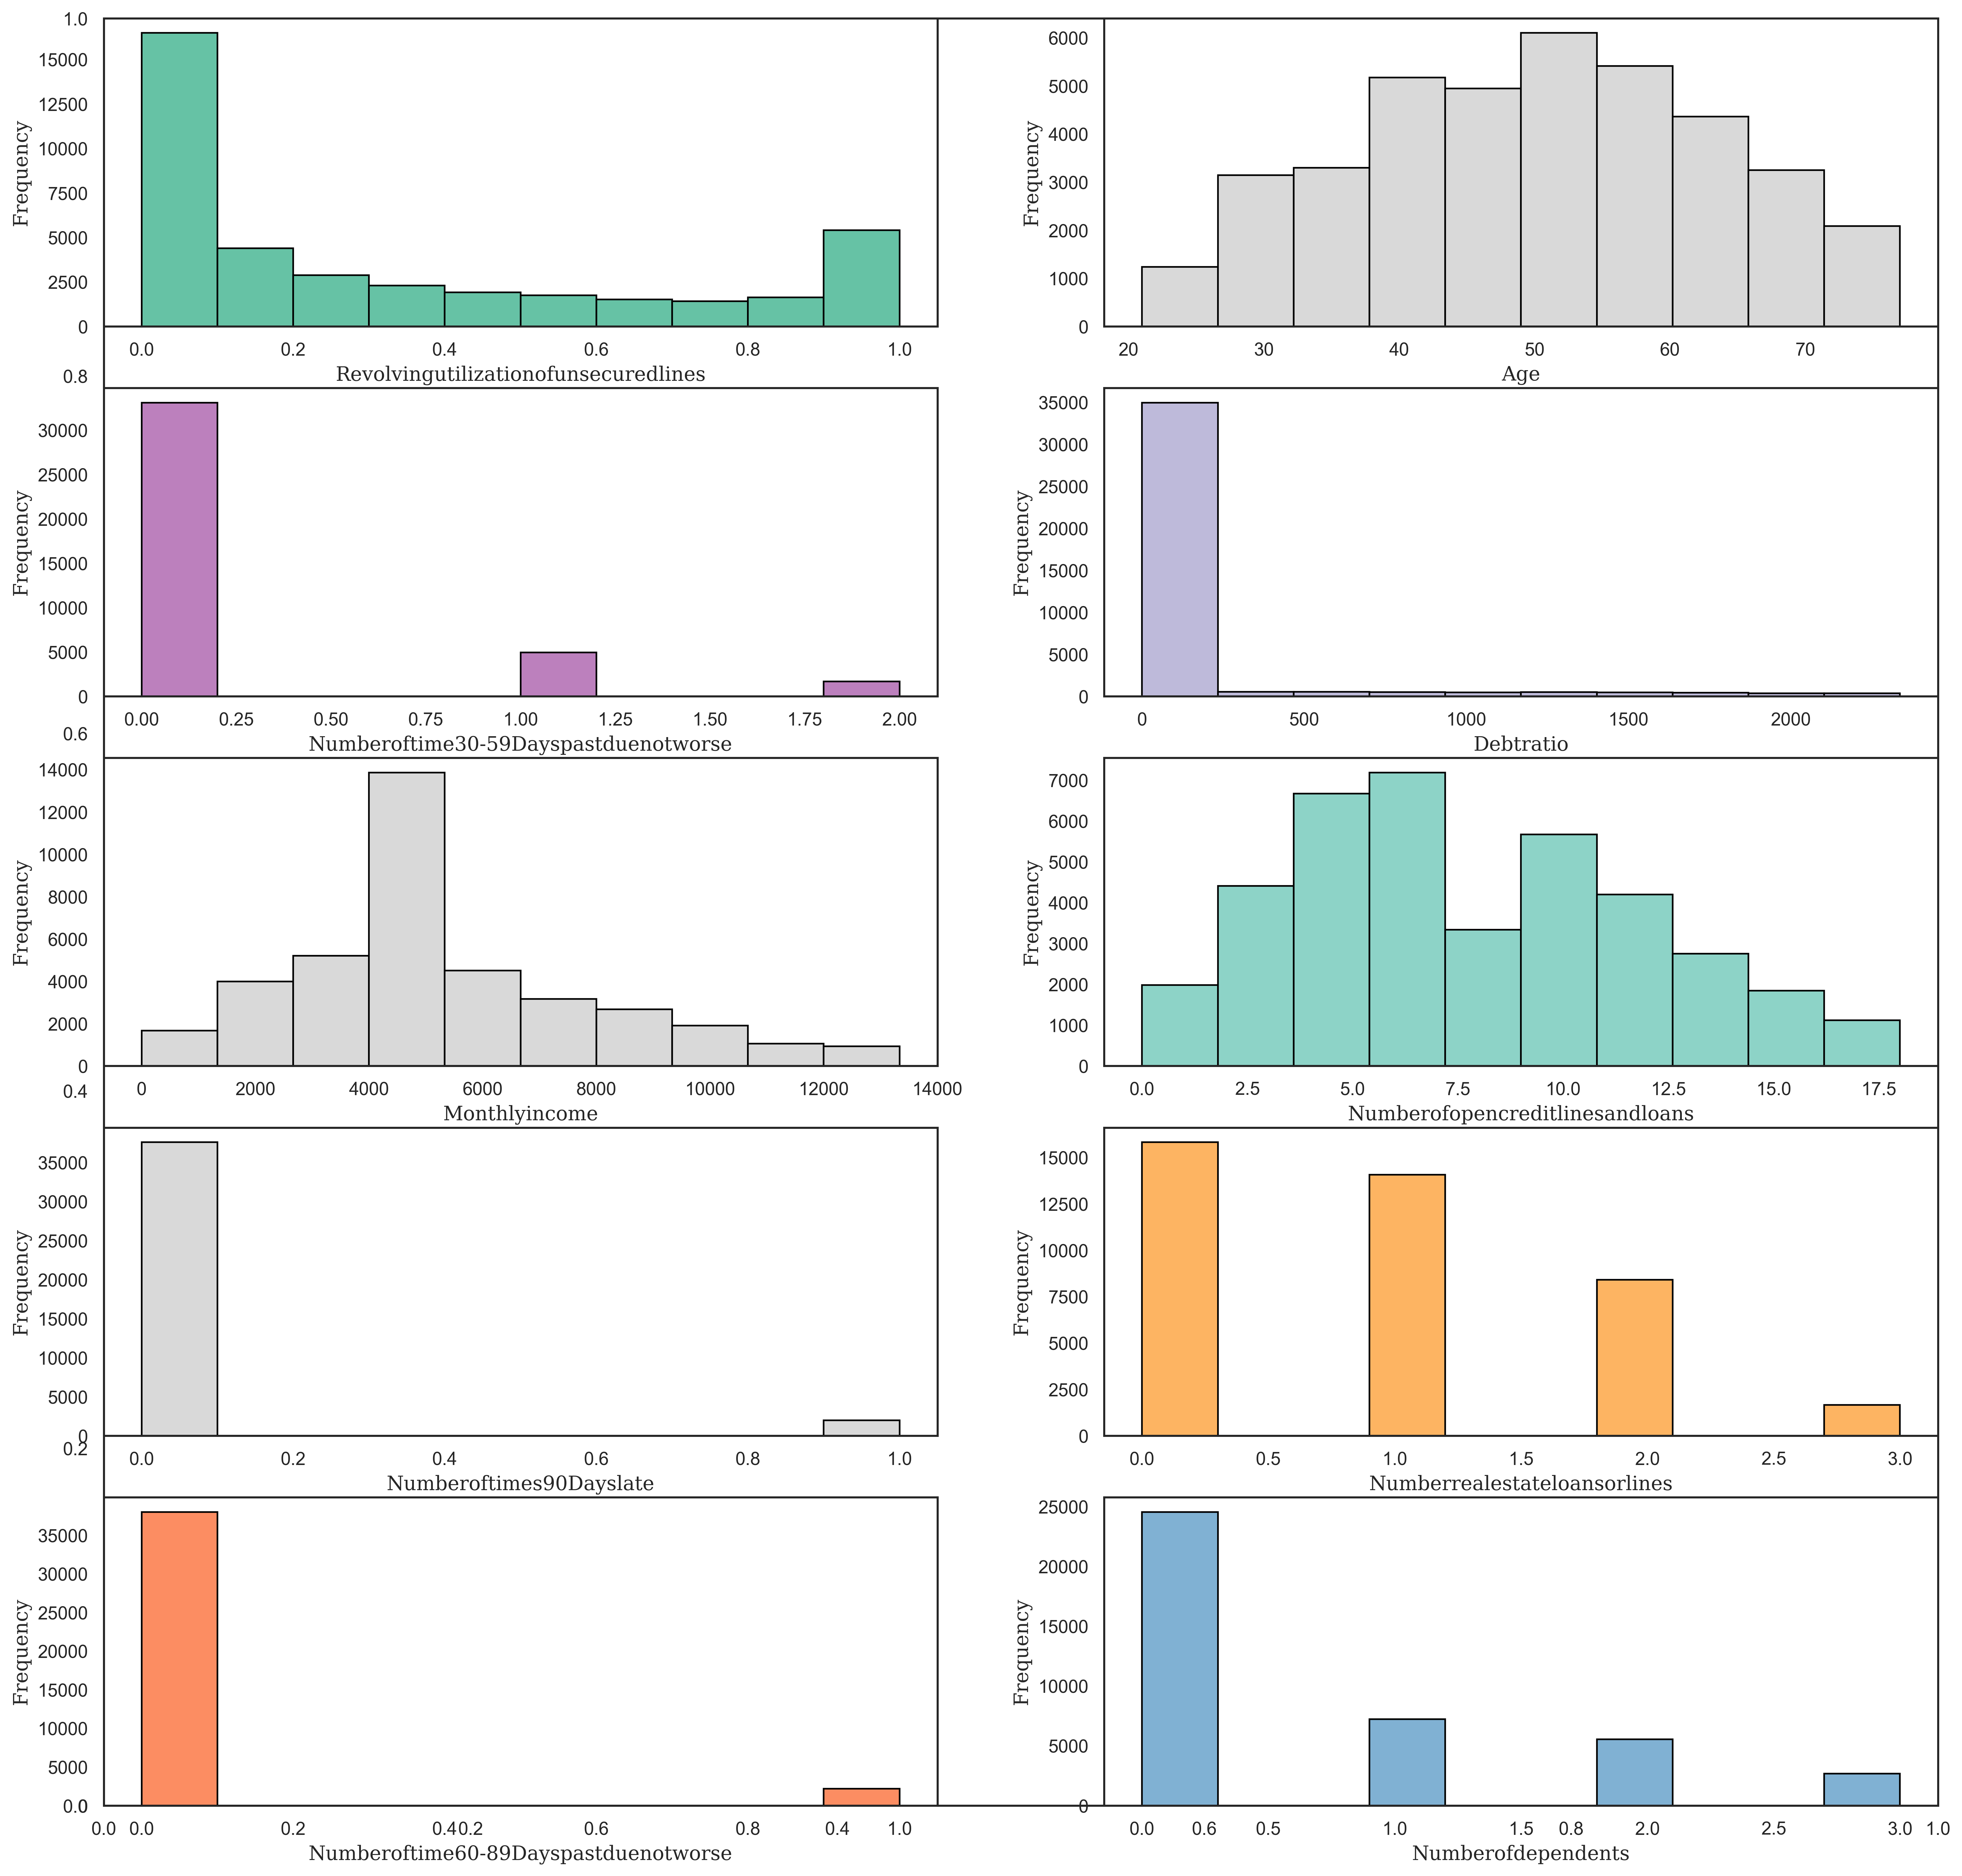

In [10]:
viz.hist_panel(numerics, cut=True)

plt.savefig(OUTPUT_DIR + 'figure-4.png')

In [32]:
import seaborn as sns

In [33]:
sns.heatmapmap?